In [56]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
tc=pd.read_csv('TelcoChurn.csv')
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
tc.shape

(7043, 21)

In [4]:
tc.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#data type checking
tc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
#numerical variables
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#converting total charges to numerical type
tc.TotalCharges = pd.to_numeric(tc.TotalCharges, errors='coerce')
tc.isnull().sum()
#coerce is used for converting one kind to other kind, here float to int

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.02, 'count of target variable per category')

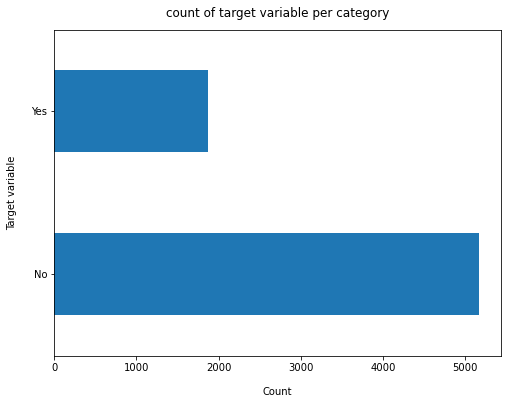

In [8]:
tc['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target variable', labelpad=14)
plt.title('count of target variable per category', y = 1.02)

In [9]:
#calculating the churn percentage of Yes and No
100*tc['Churn'].value_counts()/len(tc['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
#calculating the number of Yes and No , Churn
tc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
len(tc['Churn'])

7043

Since No to Yes ratio is 73:27, the data is imbalanced

In [12]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\Anwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


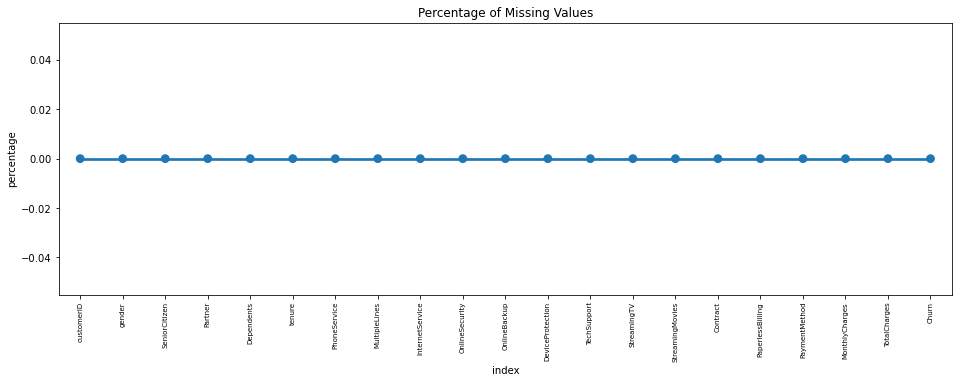

In [13]:
#percentage of missing values. to identify any
missing=pd.DataFrame((tc.isnull().sum())*100/tc.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("percentage")
plt.show()

In [14]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#getting details about the maximum tenure
#also create create teunure groups like 0-12 months, 13 to 24 months like that
print(tc['tenure'].max())

72


In [16]:
#grouping tenure by 12 months
labels = ["{0}-{1}".format(i,i+11) for i in range (1, 72,12)]
tc['tenure_group']=pd.cut(tc.tenure, range(1,80,12), right = False, labels=labels)

In [17]:
tc['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [18]:
tc_copy=tc.copy()
#creating a copy of the base data to keep the original from getting edited

In [19]:
#droping columns of customer id and tenure
tc_copy.drop(columns=['customerID', 'tenure'], axis = 1, inplace = True)
tc_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


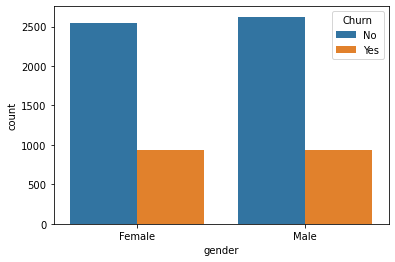

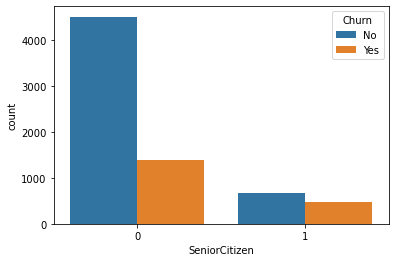

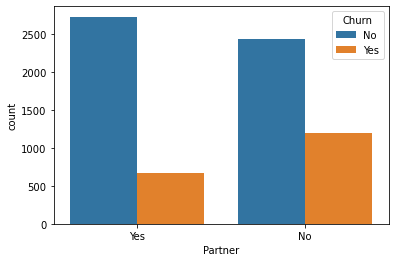

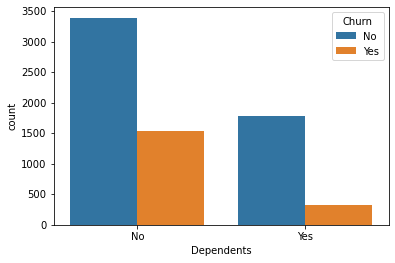

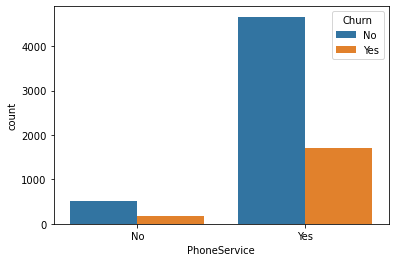

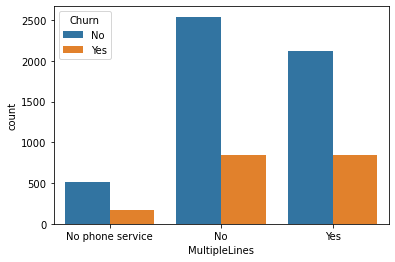

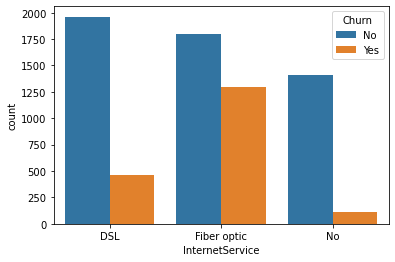

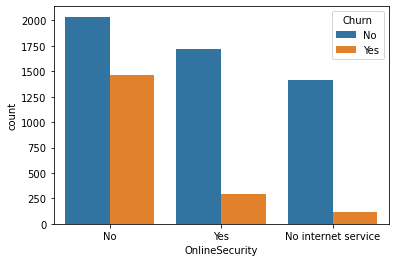

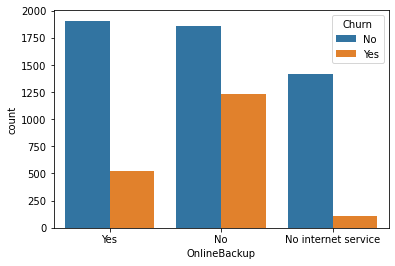

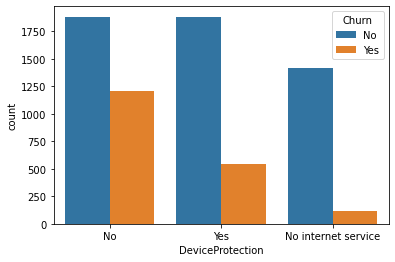

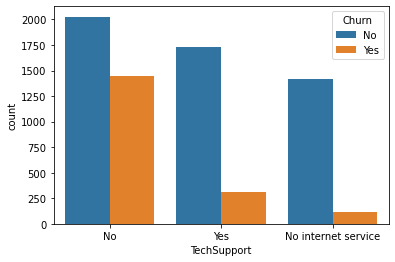

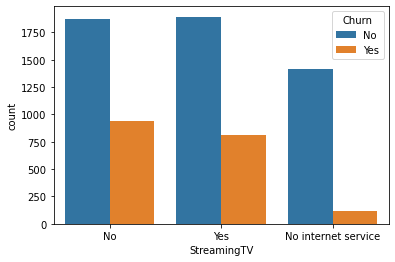

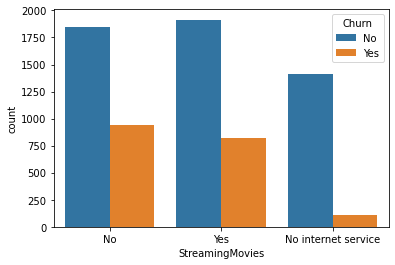

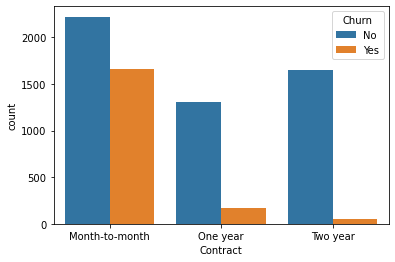

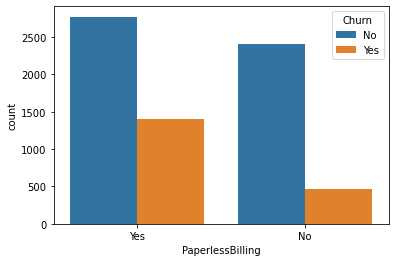

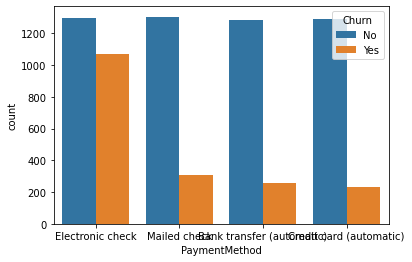

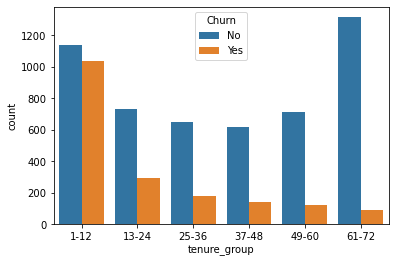

In [20]:
#Understanding the data
for i, predictor in enumerate (tc_copy.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tc_copy, x=predictor, hue='Churn')

In [21]:
#conervting Churn Yes or No to 1 and 0, chrun is the target variable
tc_copy['Churn']=np.where(tc_copy.Churn=='Yes',1,0)
tc_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [22]:
#conerting catgeorical variables to dummy variables
#do label encoding for target variables
tc_copy_dummies=pd.get_dummies(tc_copy)
tc_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


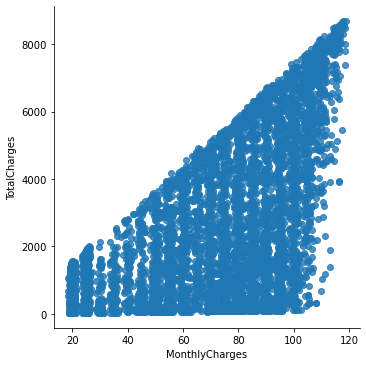

In [23]:
#findting the relationship between monthly charges and total charges
sns.lmplot(data=tc_copy_dummies, x='MonthlyCharges', y = 'TotalCharges', fit_reg=False)

Total charges increases as monthly charges increases

Text(0.5, 1.0, 'Monthly charges by Churn')

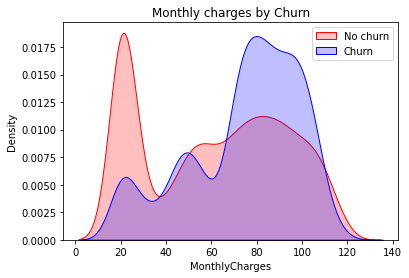

In [24]:
#churn by monthly and total charges
mon=sns.kdeplot(tc_copy_dummies.MonthlyCharges[(tc_copy_dummies['Churn']==0)],color='r',shade=True)
mon=sns.kdeplot(tc_copy_dummies.MonthlyCharges[(tc_copy_dummies['Churn']==1)],ax=mon, color='b',shade=True)
mon.legend(['No churn','Churn'], loc='upper right')
mon.set_ylabel=('Density')
mon.set_xlabel=('Monthly Charges')
mon.set_title('Monthly charges by Churn')
    

Infefrence: churn is high when monthly charges are high

<AxesSubplot:>

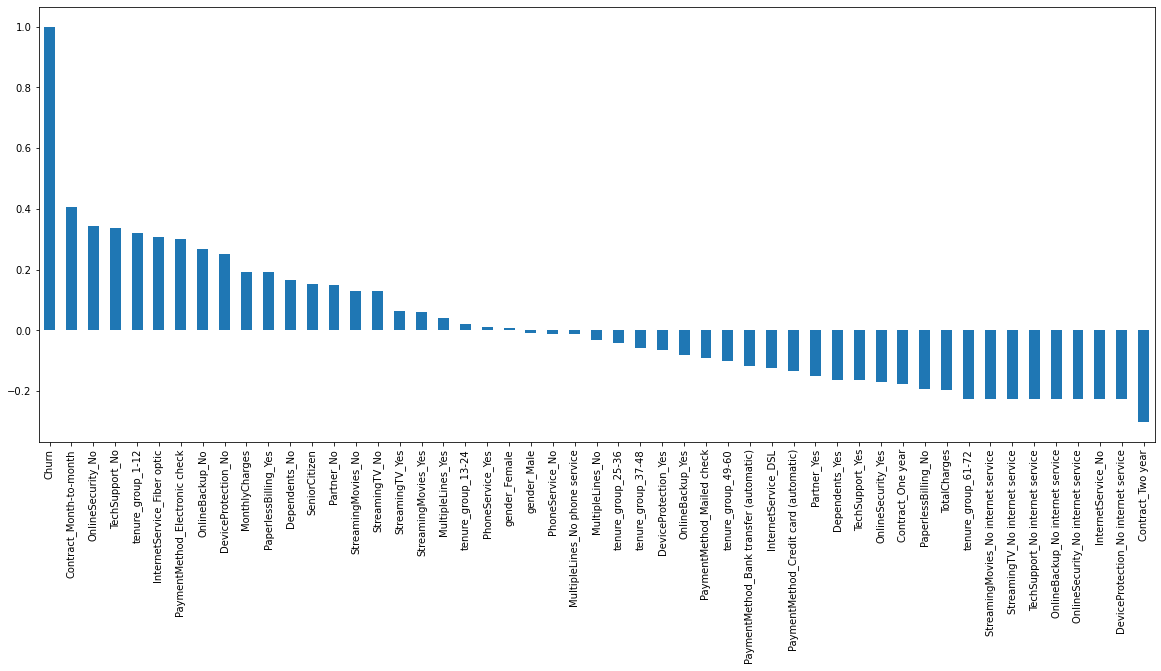

In [25]:
#making a correlation 
plt.figure(figsize=(20,8))
tc_copy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

values above zero scale gives a positive churn tendancy

In [26]:
#bi-variate analysis
new_tc00=tc_copy.loc[tc_copy['Churn']==0]
new_tc01=tc_copy.loc[tc_copy['Churn']==1]

In [27]:
def uniplot(df,col,title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

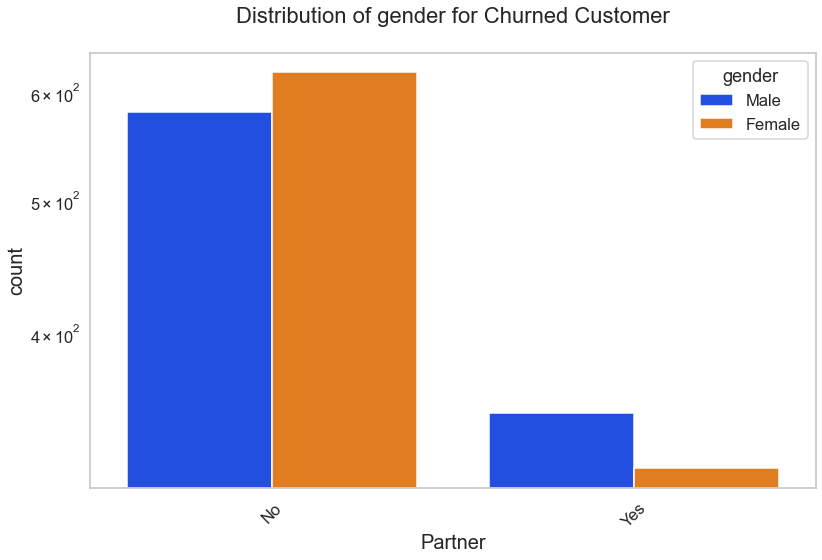

In [28]:
uniplot(new_tc01,col='Partner',title='Distribution of gender for Churned Customer', hue = 'gender')

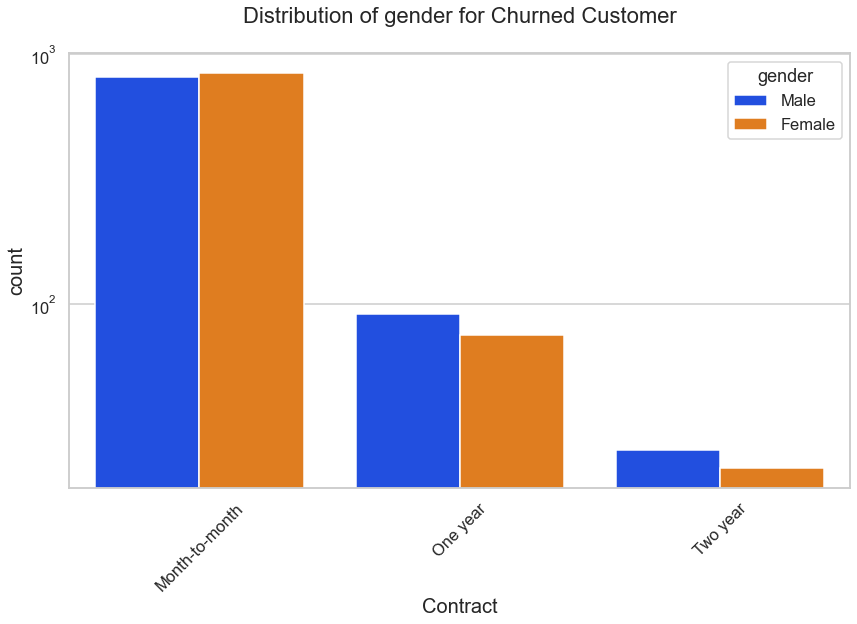

In [29]:
uniplot(new_tc01,col='Contract',title='Distribution of gender for Churned Customer', hue = 'gender')

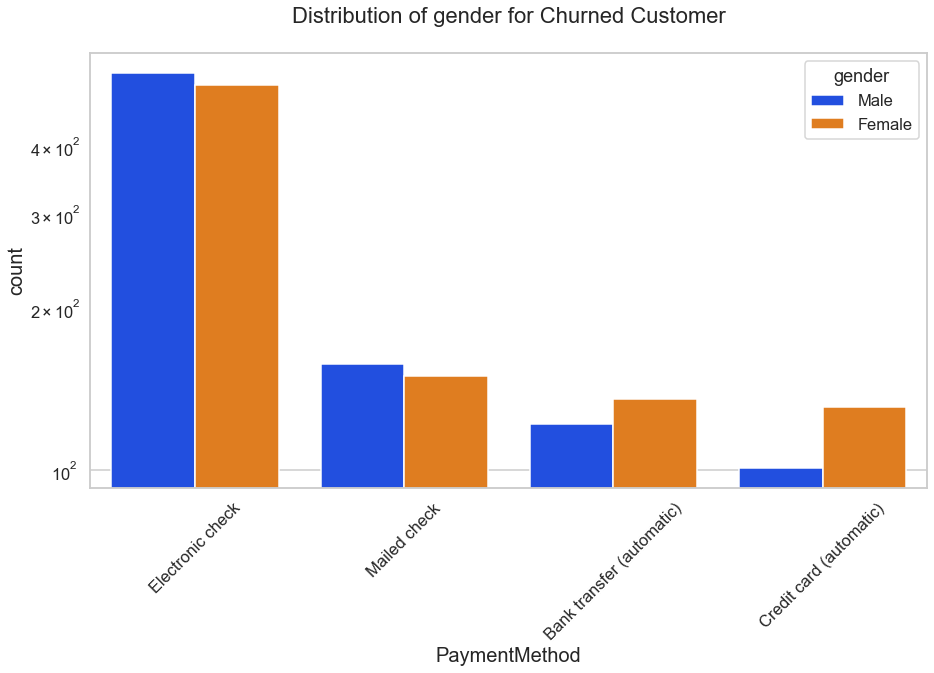

In [30]:
uniplot(new_tc01,col='PaymentMethod',title='Distribution of gender for Churned Customer', hue = 'gender')

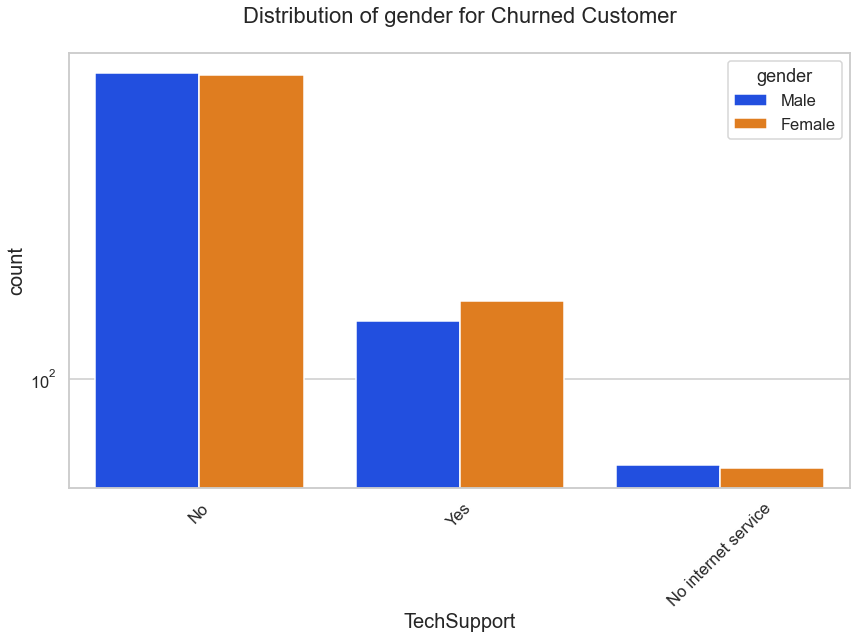

In [31]:
uniplot(new_tc01,col='TechSupport',title='Distribution of gender for Churned Customer', hue = 'gender')

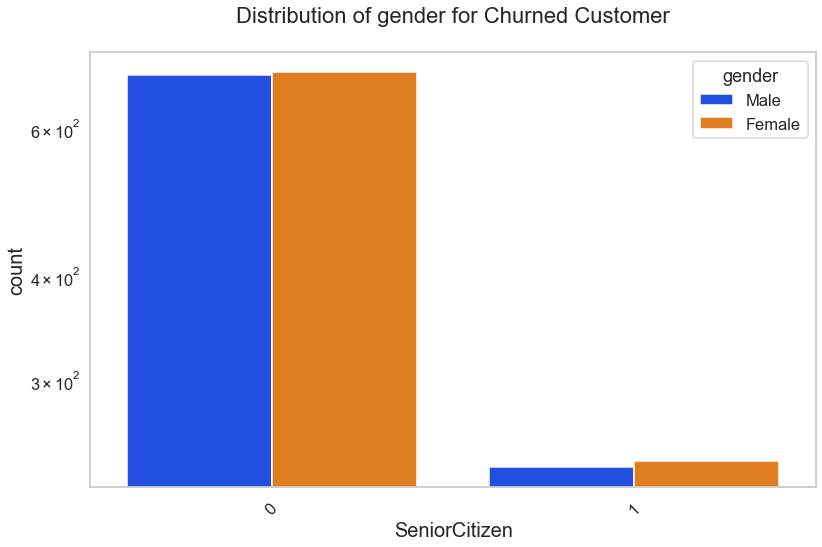

In [32]:
uniplot(new_tc01,col='SeniorCitizen',title='Distribution of gender for Churned Customer', hue = 'gender')

In [33]:
tc_copy_dummies.to_csv('tc_copy_dummies.csv')

Inference:
    electroncic cheque medium has the highest churn tendency
    monthly contract customers has tendency for churn
    no online and tech support has high churn tendency
    non-senior citizen are higher churners, both male and female

# Building the model

In [34]:
tc_model=pd.read_csv('tc_copy_dummies.csv')
tc_model.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [35]:
tc_model=tc_model.drop('Unnamed: 0',axis =1)

In [36]:
tc_model.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [37]:
#create x and y variable
X=tc_model.drop('Churn', axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [38]:
Y=tc_model['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [39]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Decision Tree Classifier

In [40]:
model_dt=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_split=2, min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [41]:
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [42]:
Y_pred=model_dt.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
model_dt.score(X_test, Y_pred)

1.0

In [44]:
print (confusion_matrix(Y_test,Y_pred))

[[965  76]
 [212 156]]


In [45]:
print(classification_report(Y_test,Y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1041
           1       0.67      0.42      0.52       368

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [46]:
sm=SMOTEENN()
X_resampled, Y_resampled=sm.fit_resample(X,Y)

In [47]:
Xr_train, Xr_test, Yr_train,Yr_test=train_test_split(X_resampled,Y_resampled,test_size=0.2)

In [48]:
model_dt_smot=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_split=2, min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [49]:
model_dt_smot.fit(Xr_train, Yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [50]:
Yr_pred_smot=model_dt_smot.predict(Xr_test)
Yr_pred_smot

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
print(classification_report(Yr_test,Yr_pred_smot,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       549
           1       0.94      0.94      0.94       633

    accuracy                           0.94      1182
   macro avg       0.94      0.94      0.94      1182
weighted avg       0.94      0.94      0.94      1182



In [52]:
accuracy = metrics.accuracy_score(Yr_test, Yr_pred_smot)
accuracy

0.9382402707275804

# Random forest Classifier

In [53]:
print (confusion_matrix(Yr_test,Yr_pred_smot))

[[512  37]
 [ 36 597]]


In [58]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42, max_depth = 6, min_samples_leaf=8)
model_rf.fit(X_train, Y_train)
Y_pred_rf=model_rf.predict(X_test)

In [60]:
print(classification_report(Y_test,Y_pred_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.68      0.48      0.56       368

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [62]:
print (confusion_matrix(Y_test,Y_pred_rf))

[[959  82]
 [193 175]]
